# UTILS

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")

import xopt
print(xopt.__version__)

# set up data saving locations
data_dir = "/home/physics3/ml_tuning/20230729_LCLS_Injector"


2.0a1+47.g1d5b3d1


In [2]:
from scripts.evaluate_function.screen_image import measure_beamsize, measure_background
from scripts.optimize_function import optimize_function
from scripts.characterize_emittance import characterize_emittance

In [3]:
## import variable ranges
import pandas as pd
filename = "../../variables.csv"
VARIABLE_RANGES = pd.read_csv(filename, index_col=0, header=None).T.to_dict(orient='list')
SCREEN_NAME = "OTRS:IN20:621" # OTR 3

## (Optional) Measure background image

In [4]:
MEASURE_BACKGROUND = False
BACKGROUND_FILE = f"{data_dir}/{SCREEN_NAME}_background.npy".replace(":","_")

if MEASURE_BACKGROUND:
    measure_background(SCREEN_NAME, filename=BACKGROUND_FILE)


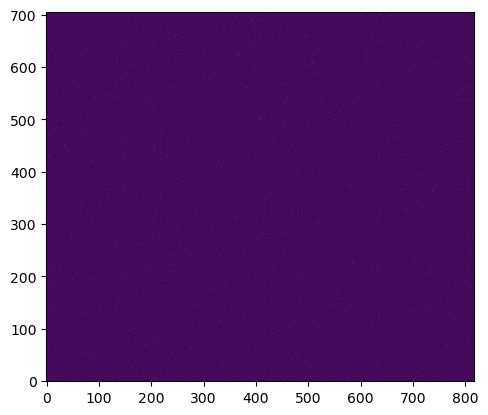

In [5]:
# verify background image
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(np.load(BACKGROUND_FILE),origin="lower")

## reset point

In [6]:
# get reset point
from epics import caget_many, caput
reset_dict = {
'SOLN:IN20:121:BCTRL': 0.4762021,
 'QUAD:IN20:121:BCTRL': 0.0078884391,
 'QUAD:IN20:122:BCTRL': -0.0019310605,
 'QUAD:IN20:361:BCTRL': -2.6188653,
 'QUAD:IN20:371:BCTRL': 2.1427768,
 'QUAD:IN20:425:BCTRL': 0.01,
 'QUAD:IN20:441:BCTRL': 0.5044999999999993,
 'QUAD:IN20:511:BCTRL': 2.7346698,
 'QUAD:IN20:525:BCTRL': -3.1
}

for name, val in reset_dict.items():
    caput(name, val)

## test measurement

,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,log10_total_intensity,time
0,410.338488,399.821393,166.217157,120.217396,-263.723033,16142.827329,4.207980,1.690674e+09
1,434.925496,328.736059,247.567252,80.916496,-199.206968,22945.940314,4.360706,1.690674e+09
2,439.587372,323.979947,250.803895,80.456986,-192.239159,21139.077166,4.325086,1.690674e+09
3,440.248672,322.447169,273.988619,83.900096,-187.392303,18291.906263,4.262259,1.690674e+09


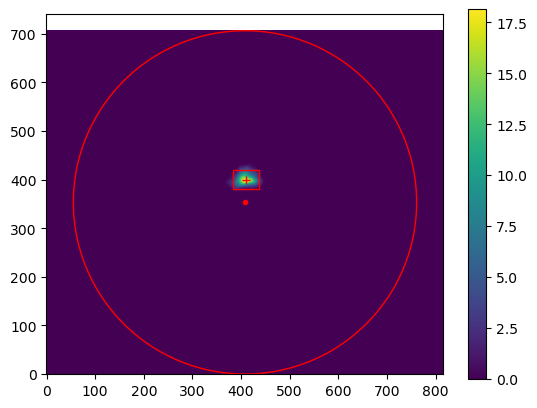

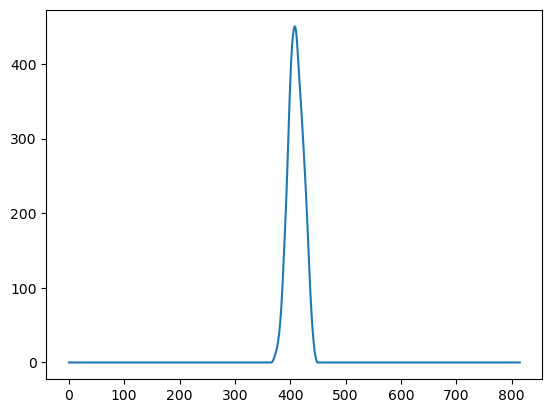

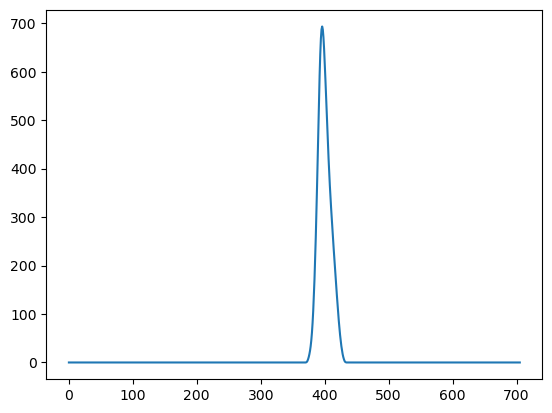

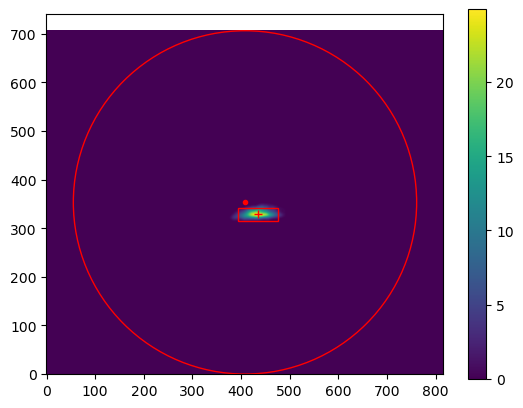

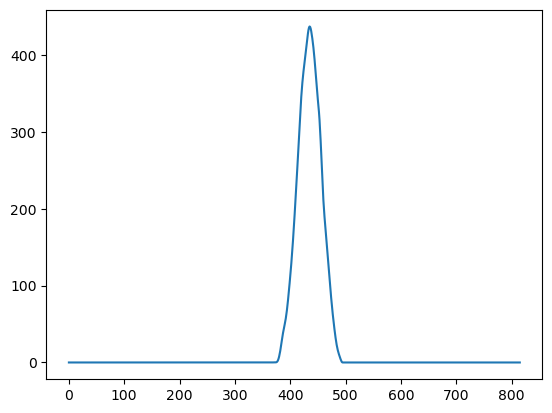

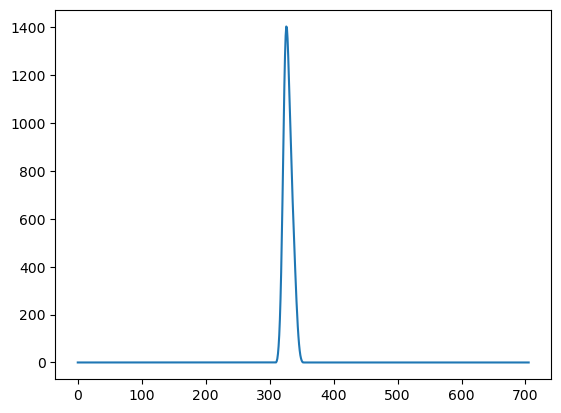

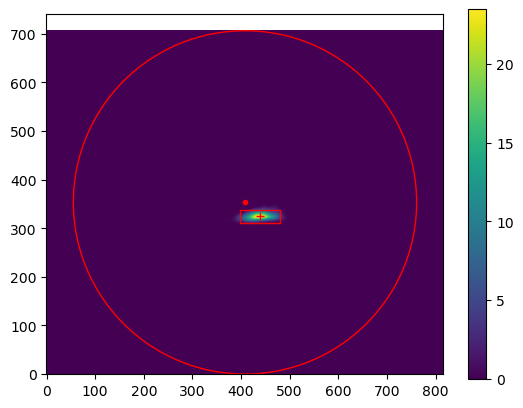

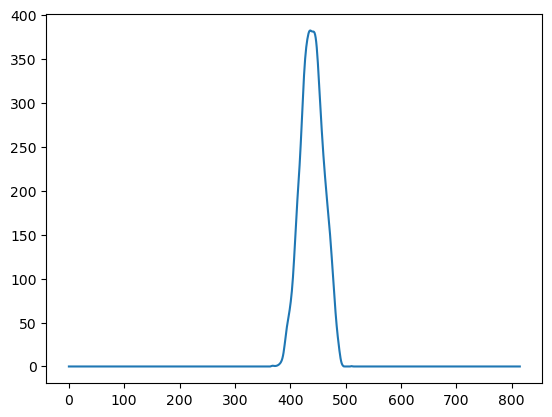

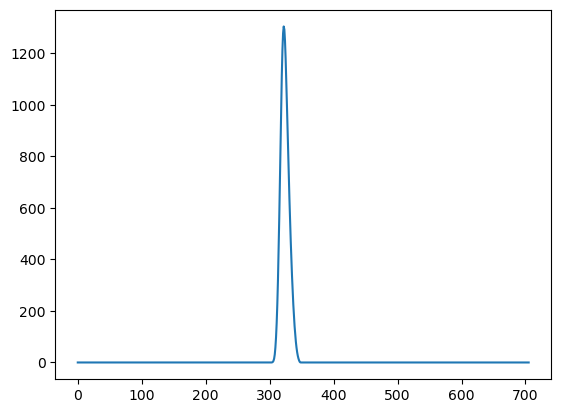

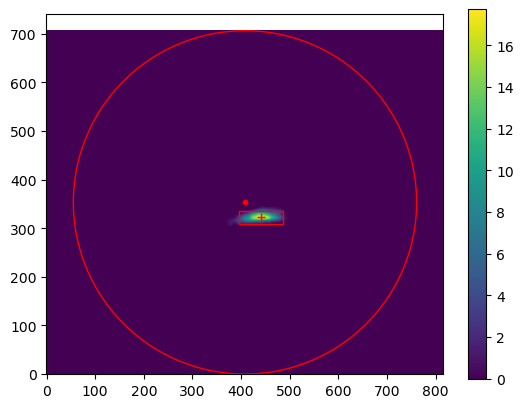

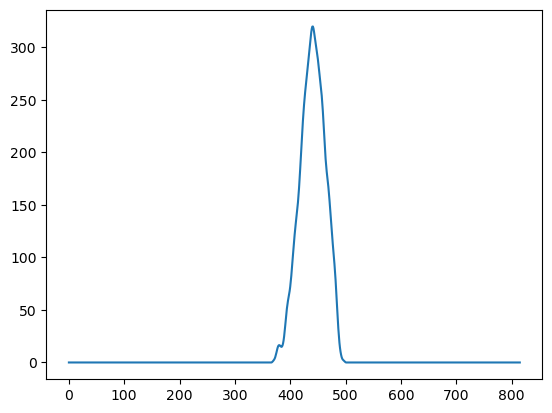

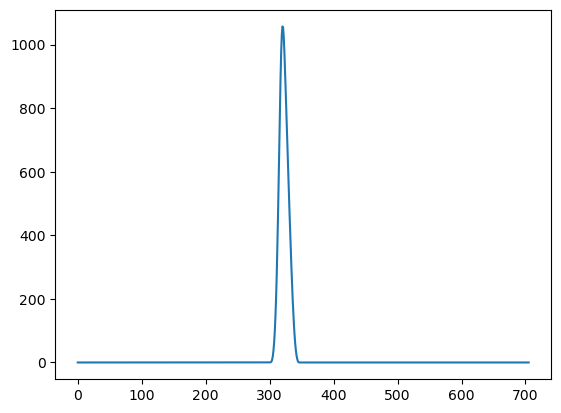

In [7]:
res = measure_beamsize({
    "screen":SCREEN_NAME, 
    "visualize": True, 
    "background":BACKGROUND_FILE, 
    "n_shots":4,
    "min_log_intensity":4.0
})
pd.DataFrame(res)